<a href="https://colab.research.google.com/github/Alejandro-Casanova/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [82]:
# Check for GPU
!nvidia-smi

Fri Jul  7 12:00:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    32W /  70W |   3751MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [83]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.0.1+cu118


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1.   **Add more layers/units to your model:** the model may not have the capability to learn enough patterns in the data. By adding layers we increase the model's complexity and therefore capability to better adjust to the data.
2.   **Train for longer:** perhaps the model didn't have enough time to learn the data patterns.
3.   **Tweak the learning rate:** if the learning rate is too high, the model may be unable to learn correctly, due to the adjustments of its parameters being too large.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [84]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [85]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [86]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/steak/256592.jpg
Image class: steak
Image height: 384
Image width: 512


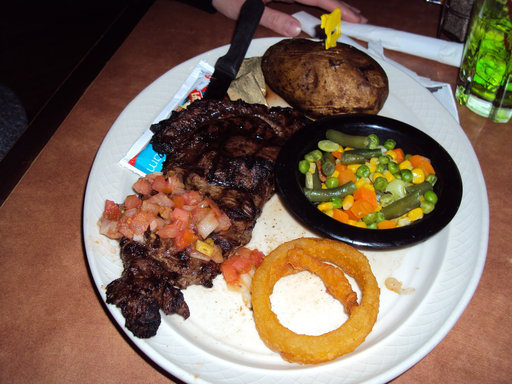

In [87]:
# Visualize an image
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

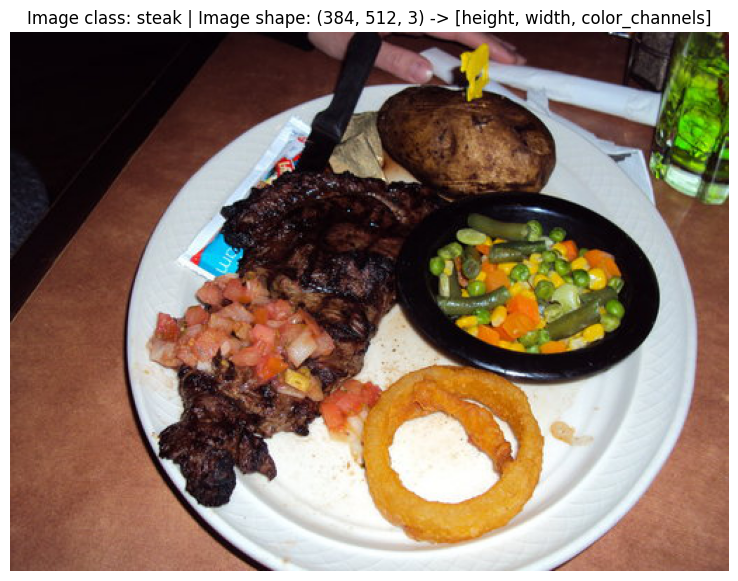

In [88]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [89]:
# 3.1 Transforming data with torchvision.transforms

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [90]:
# Write transform for turning images into tensors

data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

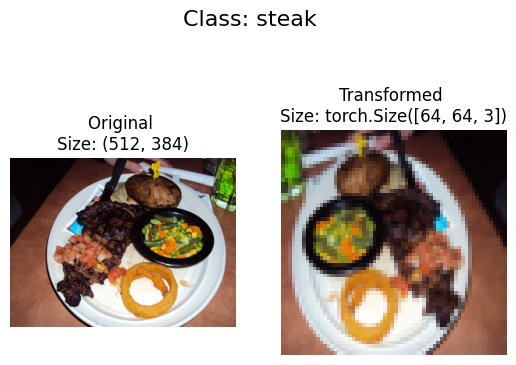

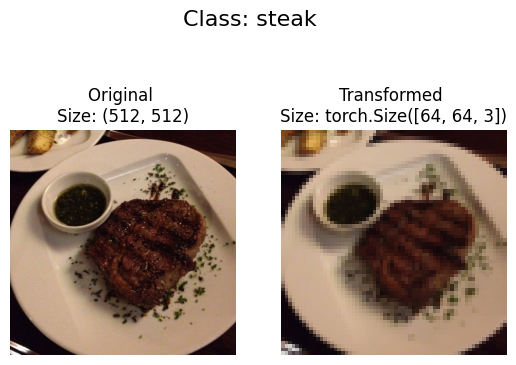

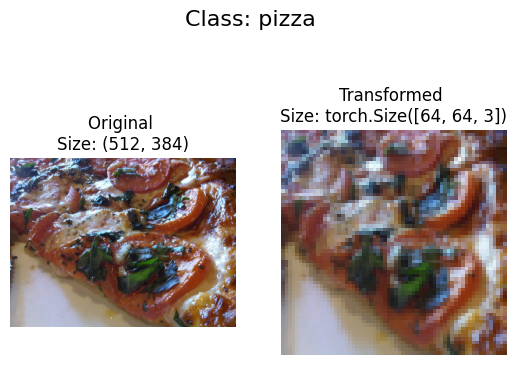

In [91]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

### Load image data using `ImageFolder`

In [92]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [93]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [94]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [95]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [96]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

BATCH_SIZE = 10
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=NUM_WORKERS, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False) # don't usually need to shuffle testing data

print(f"Num Workers: {NUM_WORKERS}")

Num Workers: 2


In [97]:
# How many batches of images are in our data loaders?
print(f"Train Dataloader has {len(train_dataloader)} batches of {BATCH_SIZE} images")
print(f"Test Dataloader has {len(test_dataloader)} batches of {BATCH_SIZE} images")

Train Dataloader has 23 batches of 10 images
Test Dataloader has 8 batches of 10 images


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [98]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary

In [99]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """

    def _wout(self, w_in: int, kernel_size: int = 3, stride: int = 1, padding: int = 1, dilation: int = 1) -> int:
      return int( ( w_in + 2 * padding - dilation * (kernel_size - 1) - 1 ) / stride + 1 )

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int, image_size: int = 64) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        output_shape_1 = self._wout(self._wout(self._wout(image_size)), kernel_size=2, stride=2, padding=0)
        output_shape_2 = self._wout(self._wout(self._wout(output_shape_1)), kernel_size=2, stride=2, padding=0)
        # print(f"Out shape 1: {output_shape_1} - Out shape 2: {output_shape_2}")

        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=int(hidden_units*output_shape_2*output_shape_2),
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        # x = self.conv_block_1(x)
        # # print(x.shape)
        # x = self.conv_block_2(x)
        # # print(x.shape)
        # x = self.classifier(x)
        # # print(x.shape)
        # return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_ref = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                    hidden_units=10,
                    output_shape=len(train_data.classes),
                    image_size=64).to(device)

summary(model_ref, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## 4. Create training and testing functions for `model_0`.

In [100]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):

    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_logits = model(X)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_logits, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_logits)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [101]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():

    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):

      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)
      # print(f"y_pred shape: {y_pred.shape}")

      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred, y)
      test_loss += loss.item()
      # print(f"Loss: {loss}")
      # print(f"Loss shape: {loss.shape}, datatype: {loss.dtype}")
      # print(f"Tes_Loss: {test_loss}")

      # Calculate and accumulate accuracy
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      test_acc += (y_pred_class == y).sum().item()/len(y)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss /= len(dataloader)
  test_acc /= len(dataloader)
  return test_loss, test_acc

In [102]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  train_start_time = timer()

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  train_time = timer() - train_start_time

  # Return the results dictionary
  return results, train_time

In [103]:
from typing import Tuple, Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [104]:
from copy import deepcopy

model_0 = deepcopy(model_ref)
model_1 = deepcopy(model_ref)
model_2 = deepcopy(model_ref)

In [105]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

results_0, train_time_0 = train(model_0, train_dataloader, test_dataloader, optimizer, loss_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1132 | train_acc: 0.2870 | test_loss: 1.1169 | test_acc: 0.2375
Epoch: 2 | train_loss: 1.1014 | train_acc: 0.3435 | test_loss: 1.1035 | test_acc: 0.3125
Epoch: 3 | train_loss: 1.1001 | train_acc: 0.3522 | test_loss: 1.1109 | test_acc: 0.3125
Epoch: 4 | train_loss: 1.0963 | train_acc: 0.4174 | test_loss: 1.1017 | test_acc: 0.3875
Epoch: 5 | train_loss: 1.0652 | train_acc: 0.5087 | test_loss: 1.0689 | test_acc: 0.3875


In [106]:
import pandas as pd
df = pd.DataFrame(results_0)
df

train_loss  train_acc  test_loss  test_acc
0    1.113219   0.286957   1.116875    0.2375
1    1.101435   0.343478   1.103518    0.3125
2    1.100126   0.352174   1.110870    0.3125
3    1.096259   0.417391   1.101664    0.3875
4    1.065194   0.508696   1.068890    0.3875

In [107]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.001)

results_1, train_time_1 = train(model_1, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1132 | train_acc: 0.2870 | test_loss: 1.1169 | test_acc: 0.2375
Epoch: 2 | train_loss: 1.1014 | train_acc: 0.3435 | test_loss: 1.1036 | test_acc: 0.3125
Epoch: 3 | train_loss: 1.1002 | train_acc: 0.3522 | test_loss: 1.1110 | test_acc: 0.3125
Epoch: 4 | train_loss: 1.0963 | train_acc: 0.4087 | test_loss: 1.1015 | test_acc: 0.3875
Epoch: 5 | train_loss: 1.0645 | train_acc: 0.5087 | test_loss: 1.0615 | test_acc: 0.4250
Epoch: 6 | train_loss: 0.9604 | train_acc: 0.5783 | test_loss: 1.0199 | test_acc: 0.3750
Epoch: 7 | train_loss: 0.8601 | train_acc: 0.6217 | test_loss: 1.0387 | test_acc: 0.4750
Epoch: 8 | train_loss: 0.8392 | train_acc: 0.6304 | test_loss: 1.0035 | test_acc: 0.4750
Epoch: 9 | train_loss: 0.8109 | train_acc: 0.6304 | test_loss: 1.0122 | test_acc: 0.5000
Epoch: 10 | train_loss: 0.7845 | train_acc: 0.6783 | test_loss: 1.0374 | test_acc: 0.4125
Epoch: 11 | train_loss: 0.7722 | train_acc: 0.6435 | test_loss: 1.0255 | test_acc: 0.5125
Epoch: 12 | train_l

In [108]:
df = pd.DataFrame(results_1)
df

train_loss  train_acc  test_loss  test_acc
0     1.113219   0.286957   1.116875    0.2375
1     1.101431   0.343478   1.103550    0.3125
2     1.100168   0.352174   1.111009    0.3125
3     1.096288   0.408696   1.101546    0.3875
4     1.064499   0.508696   1.061546    0.4250
5     0.960352   0.578261   1.019873    0.3750
6     0.860081   0.621739   1.038711    0.4750
7     0.839166   0.630435   1.003482    0.4750
8     0.810894   0.630435   1.012169    0.5000
9     0.784467   0.678261   1.037432    0.4125
10    0.772226   0.643478   1.025498    0.5125
11    0.834070   0.630435   1.028301    0.4500
12    0.775484   0.656522   1.041299    0.4375
13    0.728403   0.704348   1.001736    0.5000
14    0.766681   0.656522   1.052512    0.4750
15    0.720828   0.726087   1.028211    0.4625
16    0.698388   0.730435   1.042572    0.4875
17    0.698422   0.695652   1.013878    0.5000
18    0.645008   0.713043   0.998749    0.4750
19    0.619668   0.756522   1.039653    0.4750

In [109]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(),
                             lr=0.001)

results_2, train_time_2 = train(model_2, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1132 | train_acc: 0.2870 | test_loss: 1.1169 | test_acc: 0.2375
Epoch: 2 | train_loss: 1.1014 | train_acc: 0.3435 | test_loss: 1.1036 | test_acc: 0.3125
Epoch: 3 | train_loss: 1.1002 | train_acc: 0.3522 | test_loss: 1.1109 | test_acc: 0.3125
Epoch: 4 | train_loss: 1.0963 | train_acc: 0.4174 | test_loss: 1.1017 | test_acc: 0.3875
Epoch: 5 | train_loss: 1.0655 | train_acc: 0.5130 | test_loss: 1.0692 | test_acc: 0.3875
Epoch: 6 | train_loss: 0.9673 | train_acc: 0.5522 | test_loss: 1.0080 | test_acc: 0.4625
Epoch: 7 | train_loss: 0.8534 | train_acc: 0.6174 | test_loss: 1.0385 | test_acc: 0.4250
Epoch: 8 | train_loss: 0.8403 | train_acc: 0.6261 | test_loss: 0.9999 | test_acc: 0.5125
Epoch: 9 | train_loss: 0.8180 | train_acc: 0.6217 | test_loss: 1.0096 | test_acc: 0.4875
Epoch: 10 | train_loss: 0.7847 | train_acc: 0.6826 | test_loss: 1.0327 | test_acc: 0.4250
Epoch: 11 | train_loss: 0.7718 | train_acc: 0.6304 | test_loss: 1.0177 | test_acc: 0.5125
Epoch: 12 | train_l

In [110]:
df = pd.DataFrame(results_2)
df

train_loss  train_acc  test_loss  test_acc
0     1.113219   0.286957   1.116874    0.2375
1     1.101431   0.343478   1.103558    0.3125
2     1.100153   0.352174   1.110931    0.3125
3     1.096312   0.417391   1.101652    0.3875
4     1.065510   0.513043   1.069176    0.3875
5     0.967327   0.552174   1.007988    0.4625
6     0.853419   0.617391   1.038490    0.4250
7     0.840276   0.626087   0.999866    0.5125
8     0.818048   0.621739   1.009585    0.4875
9     0.784691   0.682609   1.032725    0.4250
10    0.771842   0.630435   1.017735    0.5125
11    0.834426   0.634783   1.015185    0.4375
12    0.778247   0.665217   1.022310    0.4250
13    0.741716   0.686957   0.990150    0.4875
14    0.763891   0.669565   1.045315    0.4625
15    0.713815   0.695652   1.018942    0.4875
16    0.684753   0.726087   1.016705    0.4750
17    0.703063   0.682609   0.996957    0.4875
18    0.663319   0.739130   1.086485    0.4500
19    0.646876   0.721739   1.092302    0.4000
20    0.609073   0.756522   1.203393    0.5000
21    0.588763   0.747826   1.087326    0.4875
22    0.549468   0.773913   1.112382    0.5000
23    0.587753   0.752174   1.151871    0.4750
24    0.501702   0.773913   1.304644    0.4250
25    0.478728   0.817391   1.221848    0.5250
26    0.448841   0.821739   1.239941    0.4875
27    0.440320   0.782609   1.122369    0.5500
28    0.460172   0.808696   1.351576    0.5125
29    0.379131   0.839130   1.144659    0.5625
30    0.400963   0.847826   1.186597    0.5375
31    0.358613   0.856522   1.321244    0.5500
32    0.325252   0.865217   1.273089    0.5250
33    0.287590   0.891304   1.397277    0.4750
34    0.236577   0.913043   1.588787    0.5125
35    0.270003   0.900000   1.495495    0.5000
36    0.230318   0.926087   1.759696    0.5000
37    0.207050   0.934783   1.657209    0.4875
38    0.162127   0.943478   1.922524    0.4625
39    0.154812   0.952174   1.742308    0.5000
40    0.142666   0.947826   1.738282    0.5375
41    0.158013   0.956522   2.125344    0.5125
42    0.161545   0.917391   2.519739    0.4875
43    0.175727   0.930435   2.097771    0.5250
44    0.133106   0.965217   2.240557    0.5125
45    0.072779   0.991304   2.068447    0.5625
46    0.069848   0.986957   2.336085    0.5750
47    0.047784   0.991304   2.353134    0.5375
48    0.051445   0.995652   2.397609    0.5375
49    0.068357   0.982609   2.488614    0.5125

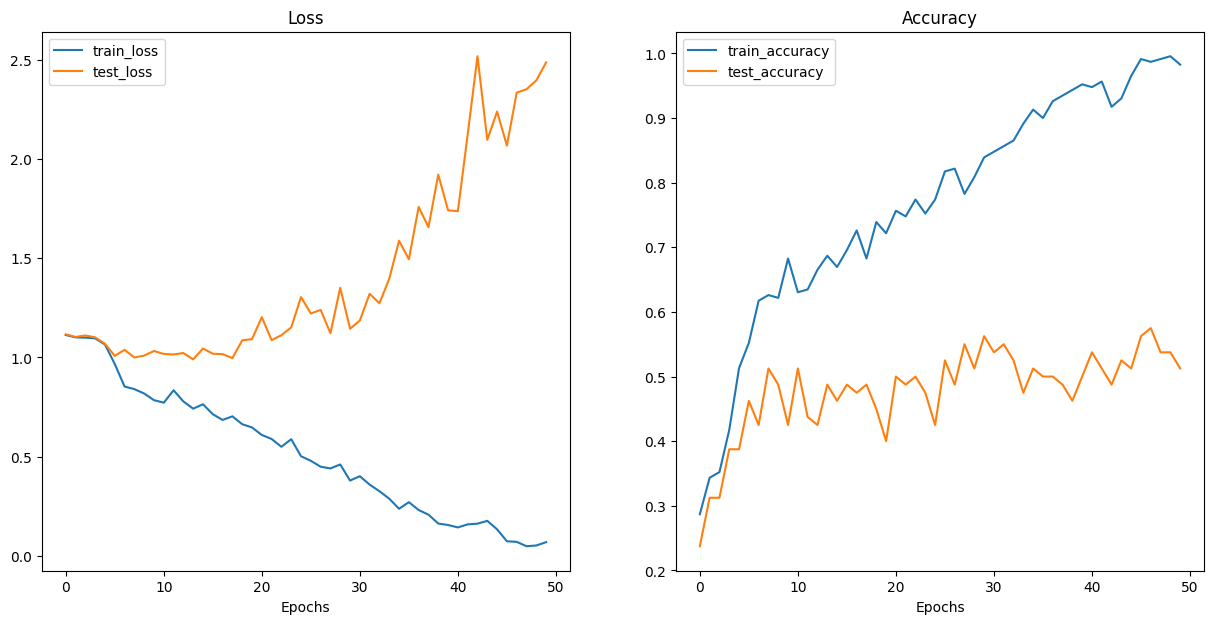

In [111]:
plot_loss_curves(results_2)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [112]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

model_4 = deepcopy(model_3)

optimizer = torch.optim.Adam(model_3.parameters(),
                             lr=0.001)

results_3, train_time_3 = train(model_3, train_dataloader, test_dataloader, optimizer, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1105 | train_acc: 0.3609 | test_loss: 1.0969 | test_acc: 0.3125
Epoch: 2 | train_loss: 1.0945 | train_acc: 0.3565 | test_loss: 1.1092 | test_acc: 0.2625
Epoch: 3 | train_loss: 1.0551 | train_acc: 0.4435 | test_loss: 1.0302 | test_acc: 0.4500
Epoch: 4 | train_loss: 0.9694 | train_acc: 0.4913 | test_loss: 1.0109 | test_acc: 0.4625
Epoch: 5 | train_loss: 0.9276 | train_acc: 0.5435 | test_loss: 1.0198 | test_acc: 0.4625
Epoch: 6 | train_loss: 0.9238 | train_acc: 0.5478 | test_loss: 1.1526 | test_acc: 0.3375
Epoch: 7 | train_loss: 0.8387 | train_acc: 0.6217 | test_loss: 0.9705 | test_acc: 0.4875
Epoch: 8 | train_loss: 0.8087 | train_acc: 0.6304 | test_loss: 1.0196 | test_acc: 0.4750
Epoch: 9 | train_loss: 0.8453 | train_acc: 0.5913 | test_loss: 0.9953 | test_acc: 0.4625
Epoch: 10 | train_loss: 0.7652 | train_acc: 0.7087 | test_loss: 0.9888 | test_acc: 0.4250
Epoch: 11 | train_loss: 0.7258 | train_acc: 0.6870 | test_loss: 1.0583 | test_acc: 0.4375
Epoch: 12 | train_l

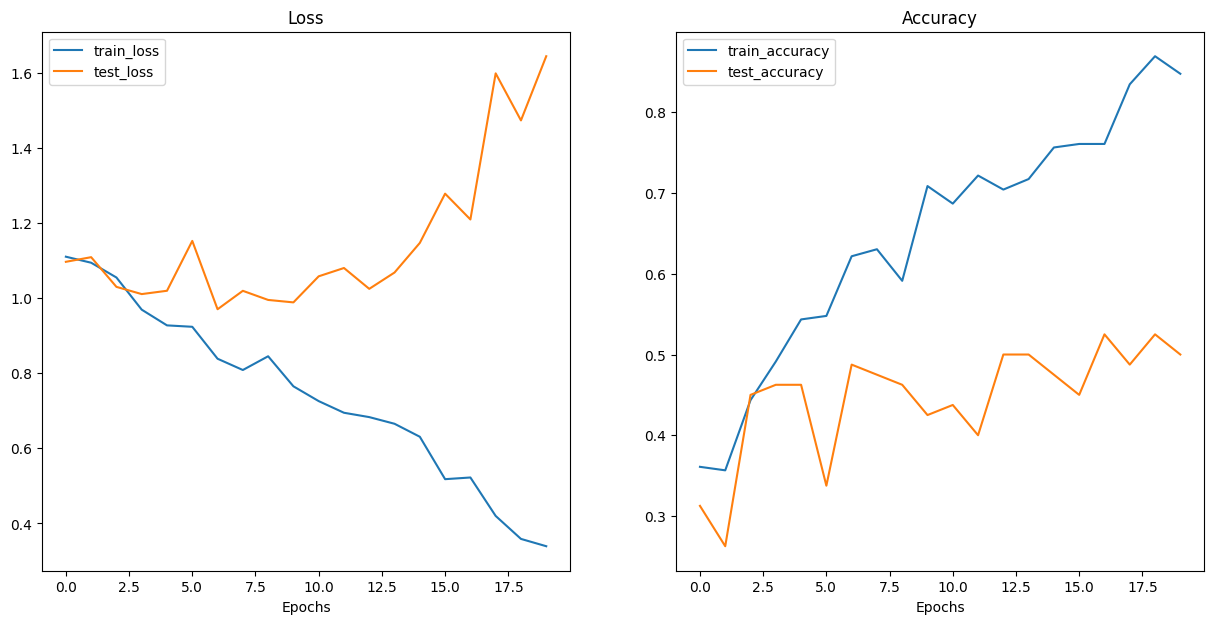

In [113]:
plot_loss_curves(results_3)

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [114]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
zip_path = data_path / "pizza_steak_sushi_20_percent.zip"
if zip_path.is_file():
    print(f"{zip_path} file exists.")
else:
    with open(zip_path, "wb") as f:
      request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
      print("Downloading pizza, steak, sushi 20% data...")
      f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi_20_percent directory exists.
Unzipping pizza, steak, sushi 20% data...


In [115]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.


Excellent, we now have double the training and testing images...

In [116]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [117]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

# Create datasets
train_20_precent_data = datasets.ImageFolder(root=train_data_20_percent_path, # target folder of images
                                  transform=simple_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_20_precent_dataset = datasets.ImageFolder(root=test_data_20_percent_path,
                                               transform=simple_transform)


# Create dataloaders
BATCH_SIZE = 20

train_20_precent_dataloader = DataLoader(dataset=train_20_precent_data,
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=NUM_WORKERS, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_20_precent_dataloader = DataLoader(dataset=test_20_precent_dataset,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False) # don't usually need to shuffle testing data

print(f"Train Dataloader: {len(train_20_precent_dataloader)} batches of {BATCH_SIZE} images")
print(f"Train Dataloader: {len(test_20_precent_dataloader)} batches of {BATCH_SIZE} images")

Train Dataloader: 23 batches of 20 images
Train Dataloader: 8 batches of 20 images


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0977 | train_acc: 0.3239 | test_loss: 1.0642 | test_acc: 0.4313
Epoch: 2 | train_loss: 1.0258 | train_acc: 0.4913 | test_loss: 0.9579 | test_acc: 0.4688
Epoch: 3 | train_loss: 0.9327 | train_acc: 0.5674 | test_loss: 0.9195 | test_acc: 0.5375
Epoch: 4 | train_loss: 0.8624 | train_acc: 0.6304 | test_loss: 0.9014 | test_acc: 0.6063
Epoch: 5 | train_loss: 0.8360 | train_acc: 0.6239 | test_loss: 0.8837 | test_acc: 0.5938
Epoch: 6 | train_loss: 0.8131 | train_acc: 0.6152 | test_loss: 0.9413 | test_acc: 0.5750
Epoch: 7 | train_loss: 0.8130 | train_acc: 0.6000 | test_loss: 0.8807 | test_acc: 0.6125
Epoch: 8 | train_loss: 0.7553 | train_acc: 0.6630 | test_loss: 0.8740 | test_acc: 0.6000
Epoch: 9 | train_loss: 0.7310 | train_acc: 0.6891 | test_loss: 0.8957 | test_acc: 0.5750
Epoch: 10 | train_loss: 0.7326 | train_acc: 0.6543 | test_loss: 0.8240 | test_acc: 0.6500
Epoch: 11 | train_loss: 0.6775 | train_acc: 0.7000 | test_loss: 0.9160 | test_acc: 0.6125
Epoch: 12 | train_l

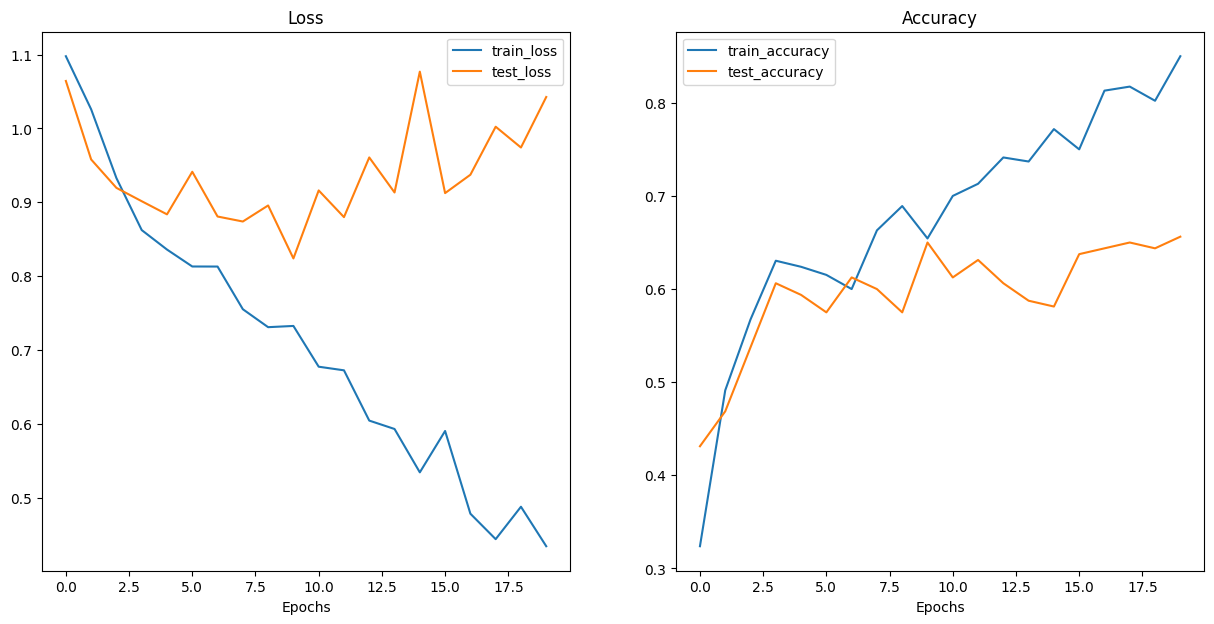

In [118]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

optimizer= torch.optim.Adam(params=model_4.parameters(),
                            lr=0.001)

results_4, train_time_4 = train(epochs=20, model=model_4, optimizer=optimizer, test_dataloader=test_20_precent_dataloader, train_dataloader=train_20_precent_dataloader)

plot_loss_curves(results_4)

The accuracy reached a higher value before overfitting started taking place!

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

data/custom_pizza_image.jpeg already exists, skipping download.


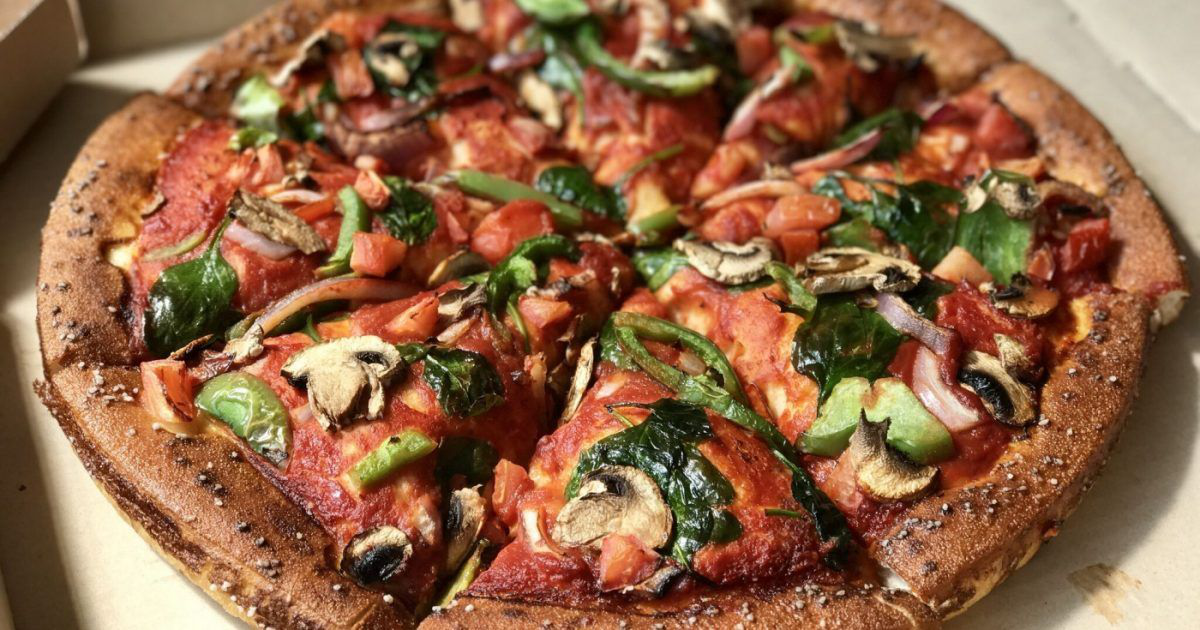

In [119]:
# Download custom image
from PIL import Image
import requests
from io import BytesIO

# Setup custom image path
custom_image_path = data_path / "custom_pizza_image.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        response = requests.get("https://raw.githubusercontent.com/Alejandro-Casanova/pytorch-deep-learning/main/data/custom_pizza_image.jpg")
        print(f"Downloading {custom_image_path}...")
        f.write(response.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

custom_img = Image.open(custom_image_path)
custom_img

In [120]:
import torchvision

# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.7333, 0.7333, 0.7412,  ..., 0.7882, 0.7882, 0.7882],
         [0.7294, 0.7333, 0.7373,  ..., 0.7882, 0.7882, 0.7882],
         [0.7255, 0.7294, 0.7333,  ..., 0.7922, 0.7882, 0.7882],
         ...,
         [0.4902, 0.4863, 0.4824,  ..., 0.9608, 0.9529, 0.9373],
         [0.4902, 0.4902, 0.4824,  ..., 0.9686, 0.9608, 0.9451],
         [0.4902, 0.4902, 0.4863,  ..., 0.9725, 0.9647, 0.9529]],

        [[0.5922, 0.5922, 0.6000,  ..., 0.7608, 0.7608, 0.7608],
         [0.5882, 0.5922, 0.5961,  ..., 0.7608, 0.7608, 0.7608],
         [0.5843, 0.5882, 0.5922,  ..., 0.7647, 0.7608, 0.7608],
         ...,
         [0.3922, 0.3882, 0.3843,  ..., 0.9059, 0.8980, 0.8824],
         [0.3922, 0.3922, 0.3843,  ..., 0.9137, 0.9059, 0.8902],
         [0.3922, 0.3922, 0.3882,  ..., 0.9176, 0.9098, 0.8980]],

        [[0.4588, 0.4588, 0.4667,  ..., 0.6902, 0.6902, 0.6902],
         [0.4549, 0.4588, 0.4627,  ..., 0.6902, 0.6902, 0.6902],
         [0.4510, 0.4549, 0.4588,  ..

In [121]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")


Original shape: torch.Size([3, 630, 1200])
New shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


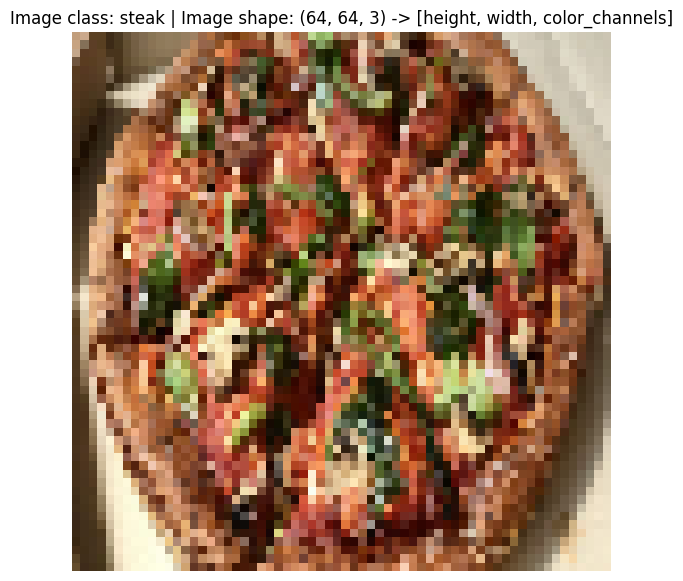

In [122]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(custom_image_transformed.permute(1,2,0))

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [123]:
model_4.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_4(custom_image_transformed.unsqueeze(dim=0).to(device))

prediction_label = torch.argmax(torch.softmax(custom_image_pred, dim=1), dim=1)
print(f"Predicted class: {class_names[prediction_label]}")

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])
Predicted class: pizza


# Let's try to improve the model

## 1. Bigger Images (128x128)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1160 | train_acc: 0.3174 | test_loss: 1.0924 | test_acc: 0.3500
Epoch: 2 | train_loss: 1.0985 | train_acc: 0.3326 | test_loss: 1.0986 | test_acc: 0.3500
Epoch: 3 | train_loss: 1.0985 | train_acc: 0.3043 | test_loss: 1.0986 | test_acc: 0.2812
Epoch: 4 | train_loss: 1.0978 | train_acc: 0.3630 | test_loss: 1.0970 | test_acc: 0.4125
Epoch: 5 | train_loss: 1.0559 | train_acc: 0.4413 | test_loss: 1.0226 | test_acc: 0.5375
Epoch: 6 | train_loss: 0.9874 | train_acc: 0.5043 | test_loss: 0.9483 | test_acc: 0.5250
Epoch: 7 | train_loss: 0.9230 | train_acc: 0.5370 | test_loss: 0.9808 | test_acc: 0.5250
Epoch: 8 | train_loss: 0.8543 | train_acc: 0.5957 | test_loss: 1.0504 | test_acc: 0.5625
Epoch: 9 | train_loss: 0.8284 | train_acc: 0.6196 | test_loss: 0.9543 | test_acc: 0.5438
Epoch: 10 | train_loss: 0.8524 | train_acc: 0.5848 | test_loss: 0.9087 | test_acc: 0.5812
Epoch: 11 | train_loss: 0.7476 | train_acc: 0.6783 | test_loss: 0.9709 | test_acc: 0.5938
Epoch: 12 | train_l

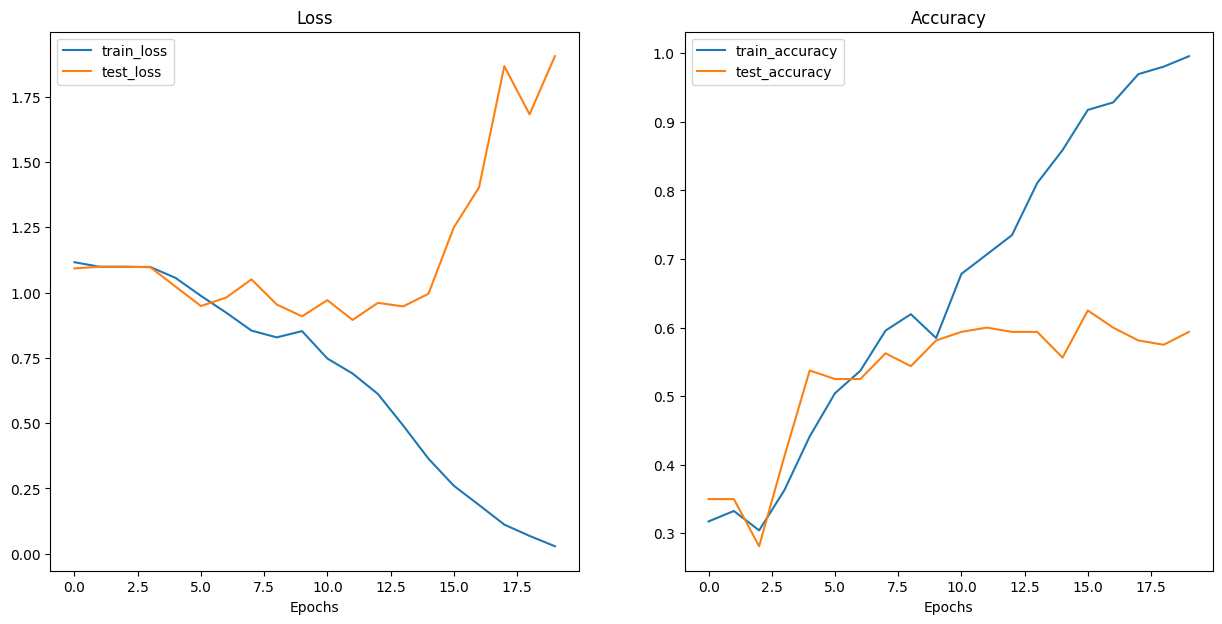

In [124]:
simple_transform = transforms.Compose([
  transforms.Resize((128, 128)),
  # transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

# Create datasets
train_20_precent_data_128 = datasets.ImageFolder( root=train_data_20_percent_path, # target folder of images
                                                  transform=simple_transform, # transforms to perform on data (images)
                                                  target_transform=None) # transforms to perform on labels (if necessary)

test_20_precent_dataset_128 = datasets.ImageFolder(root=test_data_20_percent_path,
                                                   transform=simple_transform)


# Create dataloaders
BATCH_SIZE = 20

train_20_precent_dataloader_128 = DataLoader( dataset=train_20_precent_data_128,
                                              batch_size=BATCH_SIZE, # how many samples per batch?
                                              num_workers=NUM_WORKERS, # how many subprocesses to use for data loading? (higher = more)
                                              shuffle=True) # shuffle the data?

test_20_precent_dataloader_128 = DataLoader( dataset=test_20_precent_dataset_128,
                                             batch_size=BATCH_SIZE,
                                             num_workers=NUM_WORKERS,
                                             shuffle=False) # don't usually need to shuffle testing data

model_5 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes),
                  image_size=128).to(device)

optimizer = torch.optim.Adam(params=model_5.parameters(),
                             lr=0.001)

results_5, train_time_5 = train(epochs=20,
                                model=model_5,
                                optimizer=optimizer,
                                test_dataloader=test_20_precent_dataloader_128,
                                train_dataloader=train_20_precent_dataloader_128)

plot_loss_curves(results_5)

## 2. Better Transforms

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1185 | train_acc: 0.3543 | test_loss: 1.1020 | test_acc: 0.3500
Epoch: 2 | train_loss: 1.0830 | train_acc: 0.4457 | test_loss: 1.0141 | test_acc: 0.4438
Epoch: 3 | train_loss: 1.0391 | train_acc: 0.4500 | test_loss: 1.0296 | test_acc: 0.4875
Epoch: 4 | train_loss: 0.9854 | train_acc: 0.5196 | test_loss: 0.9714 | test_acc: 0.5125
Epoch: 5 | train_loss: 0.9803 | train_acc: 0.5087 | test_loss: 0.9808 | test_acc: 0.5187
Epoch: 6 | train_loss: 0.9387 | train_acc: 0.5196 | test_loss: 0.9657 | test_acc: 0.5375
Epoch: 7 | train_loss: 0.9265 | train_acc: 0.5435 | test_loss: 1.0318 | test_acc: 0.4500
Epoch: 8 | train_loss: 0.9586 | train_acc: 0.5370 | test_loss: 0.9581 | test_acc: 0.5687
Epoch: 9 | train_loss: 0.9343 | train_acc: 0.5761 | test_loss: 0.9610 | test_acc: 0.5625
Epoch: 10 | train_loss: 0.9738 | train_acc: 0.5326 | test_loss: 0.9787 | test_acc: 0.5062
Epoch: 11 | train_loss: 0.9224 | train_acc: 0.5652 | test_loss: 0.9823 | test_acc: 0.5312
Epoch: 12 | train_l

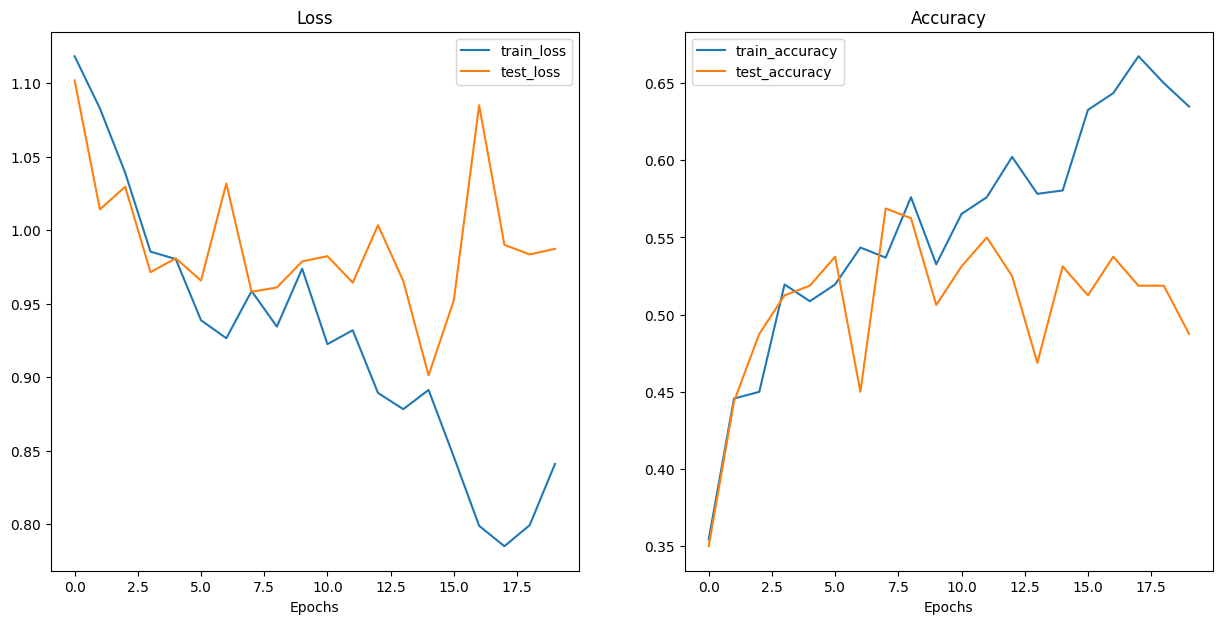

In [125]:
better_transform = transforms.Compose([
  transforms.Resize((128, 128)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.TrivialAugmentWide(),
  transforms.ToTensor()
])

# Create datasets
train_20_precent_data_bt = datasets.ImageFolder( root=train_data_20_percent_path, # target folder of images
                                                  transform=better_transform, # transforms to perform on data (images)
                                                  target_transform=None) # transforms to perform on labels (if necessary)

test_20_precent_dataset_bt = datasets.ImageFolder(root=test_data_20_percent_path,
                                                   transform=better_transform)


# Create dataloaders
BATCH_SIZE = 20

train_20_precent_dataloader_bt = DataLoader( dataset=train_20_precent_data_bt,
                                              batch_size=BATCH_SIZE, # how many samples per batch?
                                              num_workers=NUM_WORKERS, # how many subprocesses to use for data loading? (higher = more)
                                              shuffle=True) # shuffle the data?

test_20_precent_dataloader_bt = DataLoader( dataset=test_20_precent_dataset_bt,
                                             batch_size=BATCH_SIZE,
                                             num_workers=NUM_WORKERS,
                                             shuffle=False) # don't usually need to shuffle testing data

model_6 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes),
                  image_size=128).to(device)

optimizer = torch.optim.Adam(params=model_6.parameters(),
                             lr=0.001)

results_6, train_time_6 = train(epochs=20,
                                model=model_6,
                                optimizer=optimizer,
                                test_dataloader=test_20_precent_dataloader_bt,
                                train_dataloader=train_20_precent_dataloader_bt)

plot_loss_curves(results_6)

## 3. More Epochs

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1116 | train_acc: 0.3283 | test_loss: 1.1337 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0831 | train_acc: 0.3761 | test_loss: 1.0069 | test_acc: 0.5000
Epoch: 3 | train_loss: 1.0131 | train_acc: 0.4739 | test_loss: 1.0346 | test_acc: 0.4188
Epoch: 4 | train_loss: 1.0208 | train_acc: 0.4522 | test_loss: 0.9961 | test_acc: 0.4750
Epoch: 5 | train_loss: 0.9717 | train_acc: 0.4826 | test_loss: 0.9831 | test_acc: 0.4938
Epoch: 6 | train_loss: 0.9698 | train_acc: 0.5130 | test_loss: 0.9942 | test_acc: 0.4563
Epoch: 7 | train_loss: 0.9949 | train_acc: 0.5109 | test_loss: 0.9992 | test_acc: 0.4750
Epoch: 8 | train_loss: 0.9717 | train_acc: 0.5457 | test_loss: 0.9916 | test_acc: 0.5125
Epoch: 9 | train_loss: 0.9596 | train_acc: 0.5152 | test_loss: 1.0017 | test_acc: 0.4625
Epoch: 10 | train_loss: 0.9461 | train_acc: 0.5413 | test_loss: 1.0004 | test_acc: 0.5500
Epoch: 11 | train_loss: 0.9126 | train_acc: 0.5500 | test_loss: 0.9528 | test_acc: 0.5250
Epoch: 12 | train_l

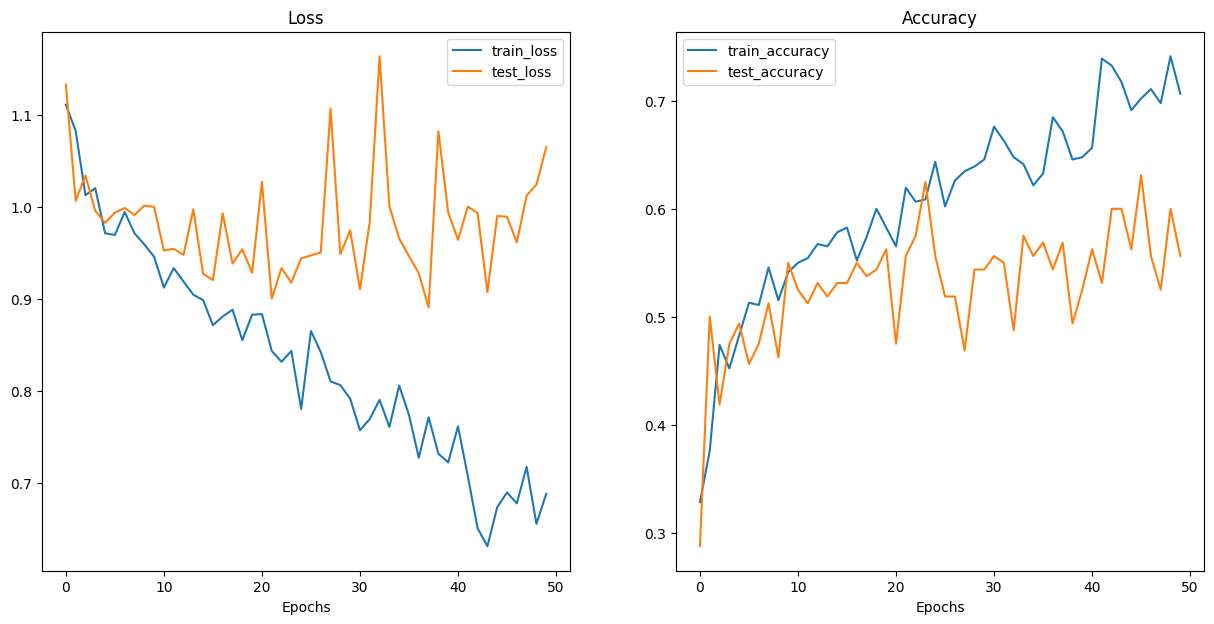

In [127]:
model_7 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes),
                  image_size=128).to(device)

optimizer = torch.optim.Adam(params=model_7.parameters(),
                             lr=0.001)

results_7, train_time_7 = train(epochs=50,
                                model=model_7,
                                optimizer=optimizer,
                                test_dataloader=test_20_precent_dataloader_bt,
                                train_dataloader=train_20_precent_dataloader_bt)

plot_loss_curves(results_7)

## 4. Bigger dataset (50%)

In [128]:
import gdown

url_dataset_50 = "https://drive.google.com/file/d/1lCuwMrB3cTM-QCVOMifo46NN8a_SNubp/view?usp=drive_link"
output = "data/pizza_steak_sushi_50_percent.zip"
image_path_50 = data_path / "pizza_steak_sushi_50_percent"
zip_path = data_path / "pizza_steak_sushi_50_percent.zip"

if not zip_path.is_file():
  gdown.download(url=url_dataset_50, output=output, quiet=False, fuzzy=True)
else:
  print("Dataset already downloaded")

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_50_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path_50)

Dataset already downloaded
Unzipping pizza, steak, sushi data...


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1068 | train_acc: 0.3570 | test_loss: 1.0615 | test_acc: 0.4149
Epoch: 2 | train_loss: 1.0331 | train_acc: 0.4553 | test_loss: 1.0063 | test_acc: 0.4737
Epoch: 3 | train_loss: 1.0153 | train_acc: 0.4614 | test_loss: 1.0000 | test_acc: 0.4246
Epoch: 4 | train_loss: 1.0035 | train_acc: 0.4816 | test_loss: 1.0080 | test_acc: 0.4289
Epoch: 5 | train_loss: 0.9785 | train_acc: 0.5193 | test_loss: 1.0231 | test_acc: 0.5158
Epoch: 6 | train_loss: 0.9790 | train_acc: 0.5202 | test_loss: 0.9775 | test_acc: 0.4868
Epoch: 7 | train_loss: 0.9621 | train_acc: 0.5237 | test_loss: 1.0399 | test_acc: 0.4842
Epoch: 8 | train_loss: 0.9509 | train_acc: 0.5526 | test_loss: 0.9745 | test_acc: 0.4982
Epoch: 9 | train_loss: 0.9558 | train_acc: 0.5272 | test_loss: 0.9449 | test_acc: 0.5325
Epoch: 10 | train_loss: 0.9458 | train_acc: 0.5588 | test_loss: 0.9453 | test_acc: 0.5132
Epoch: 11 | train_loss: 0.9231 | train_acc: 0.5570 | test_loss: 0.9837 | test_acc: 0.5289
Epoch: 12 | train_l

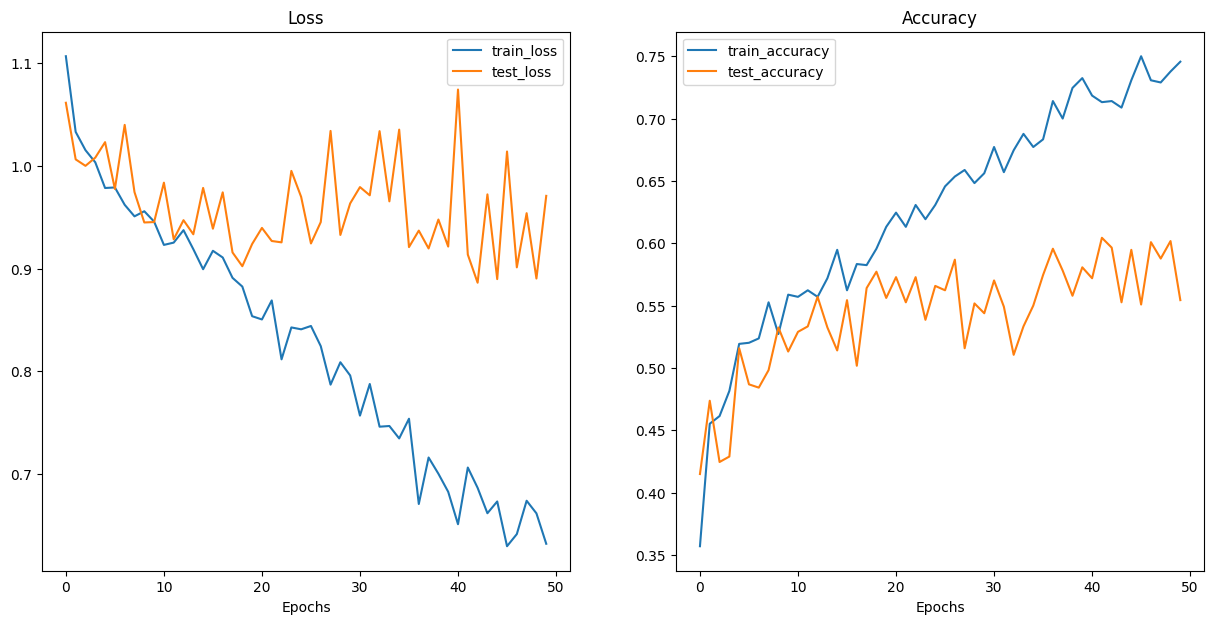

In [129]:
train_data_50_percent_path = image_path_50 / "train"
test_data_50_percent_path = image_path_50 / "test"

# Create datasets
train_50_precent_data = datasets.ImageFolder( root=train_data_50_percent_path, # target folder of images
                                                  transform=better_transform, # transforms to perform on data (images)
                                                  target_transform=None) # transforms to perform on labels (if necessary)

test_50_precent_dataset = datasets.ImageFolder(root=test_data_50_percent_path,
                                                   transform=better_transform)


# Create dataloaders
BATCH_SIZE = 20

train_50_precent_dataloader = DataLoader( dataset=train_50_precent_data,
                                              batch_size=BATCH_SIZE, # how many samples per batch?
                                              num_workers=NUM_WORKERS, # how many subprocesses to use for data loading? (higher = more)
                                              shuffle=True) # shuffle the data?

test_50_precent_dataloader = DataLoader( dataset=test_50_precent_dataset,
                                             batch_size=BATCH_SIZE,
                                             num_workers=NUM_WORKERS,
                                             shuffle=False) # don't usually need to shuffle testing data

model_8 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes),
                  image_size=128).to(device)

optimizer = torch.optim.Adam(params=model_8.parameters(),
                             lr=0.001,
                             weight_decay=0.0001)

results_8, train_time_8 = train(epochs=50,
                                model=model_8,
                                optimizer=optimizer,
                                test_dataloader=test_50_precent_dataloader,
                                train_dataloader=train_50_precent_dataloader)

plot_loss_curves(results_8)

## 5. Trying a better model (ResNet), used full dataset, and changed to SGD optimizer

In [130]:
import gdown

url_dataset_100 = "https://drive.google.com/file/d/1-QTDvD3NKV6VRx22mOc3vTV6j4JIIipD/view?usp=drive_link"
output = "data/pizza_steak_sushi_100_percent.zip"
image_path_100 = data_path / "pizza_steak_sushi_100_percent"
zip_path = data_path / "pizza_steak_sushi_100_percent.zip"

if not zip_path.is_file():
  gdown.download(url=url_dataset_100, output=output, quiet=False, fuzzy=True)
else:
  print("Dataset already downloaded")

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path_100)

Dataset already downloaded
Unzipping pizza, steak, sushi data...


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 7.4172 | train_acc: 0.3504 | test_loss: 1.1079 | test_acc: 0.3655
Epoch: 2 | train_loss: 1.4506 | train_acc: 0.3834 | test_loss: 1.5410 | test_acc: 0.4431
Epoch: 3 | train_loss: 1.3095 | train_acc: 0.4441 | test_loss: 1.3041 | test_acc: 0.5484
Epoch: 4 | train_loss: 1.0908 | train_acc: 0.4890 | test_loss: 0.9476 | test_acc: 0.5638
Epoch: 5 | train_loss: 1.0992 | train_acc: 0.5094 | test_loss: 1.6502 | test_acc: 0.5320
Epoch: 6 | train_loss: 1.0716 | train_acc: 0.5275 | test_loss: 1.0659 | test_acc: 0.5753
Epoch: 7 | train_loss: 1.0907 | train_acc: 0.5384 | test_loss: 0.9671 | test_acc: 0.5902
Epoch: 8 | train_loss: 1.0729 | train_acc: 0.5307 | test_loss: 1.3048 | test_acc: 0.6241
Epoch: 9 | train_loss: 0.9794 | train_acc: 0.5554 | test_loss: 0.9364 | test_acc: 0.5476
Epoch: 10 | train_loss: 0.9505 | train_acc: 0.5706 | test_loss: 0.8974 | test_acc: 0.5915
Epoch: 11 | train_loss: 0.9452 | train_acc: 0.5780 | test_loss: 0.8611 | test_acc: 0.6360
Epoch: 12 | train_l

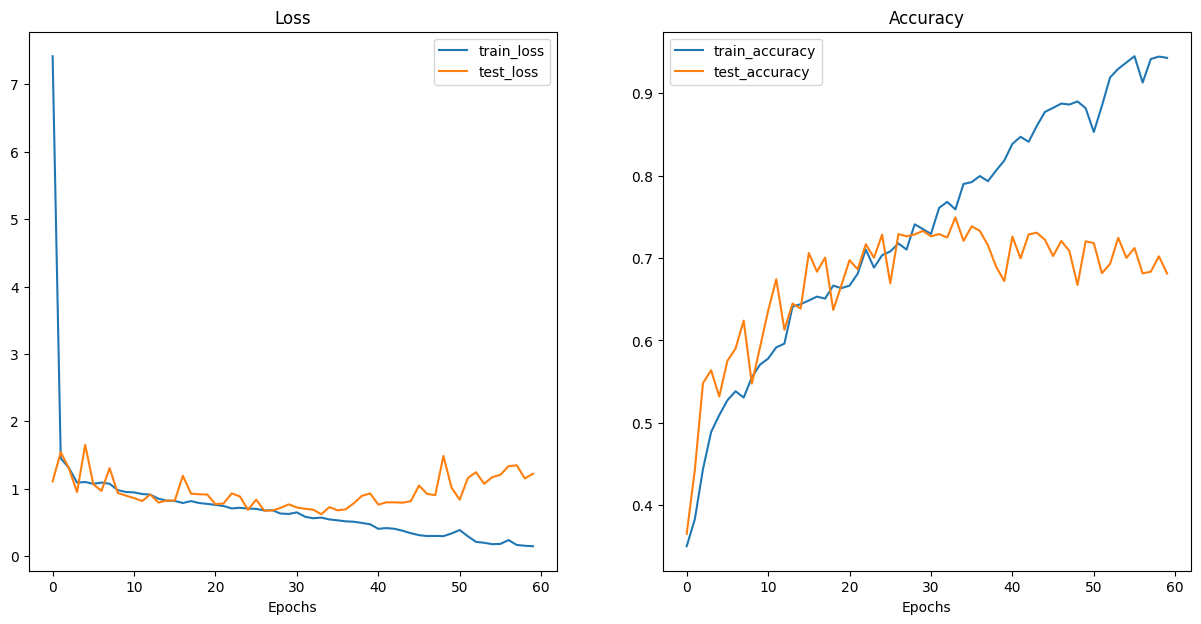

In [134]:
train_data_100_percent_path = image_path_100 / "train"
test_data_100_percent_path = image_path_100 / "test"
BATCH_SIZE = 32
EPOCHS = 60

# Create datasets
train_100_precent_data = datasets.ImageFolder( root=train_data_100_percent_path, # target folder of images
                                                  transform=simple_transform, # transforms to perform on data (images)
                                                  target_transform=None) # transforms to perform on labels (if necessary)

test_100_precent_dataset = datasets.ImageFolder(root=test_data_100_percent_path,
                                                   transform=simple_transform)


# Create dataloaders

train_100_precent_dataloader = DataLoader( dataset=train_100_precent_data,
                                           batch_size=BATCH_SIZE, # how many samples per batch?
                                           num_workers=NUM_WORKERS, # how many subprocesses to use for data loading? (higher = more)
                                           shuffle=True) # shuffle the data?

test_100_precent_dataloader = DataLoader( dataset=test_100_precent_dataset,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS,
                                          shuffle=False) # don't usually need to shuffle testing data

model_9 = torchvision.models.resnet50().to(device)

# optimizer = torch.optim.Adam(params=model_9.parameters(),
#                              lr=0.0001)
#                              weight_decay=0.001)
optimizer = torch.optim.SGD(params=model_9.parameters(),
                            lr=0.1,
                            momentum=0.9)

# summary(model_9, input_size=[1, 3, 128, 128])

results_9, train_time_9 = train(epochs=EPOCHS,
                                model=model_9,
                                optimizer=optimizer,
                                test_dataloader=test_100_precent_dataloader,
                                train_dataloader=train_100_precent_dataloader)

plot_loss_curves(results_9)